In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Данные

Были использованы искусственно сгенерированные двухмерные данные.

In [ ]:
df = pd.DataFrame(np.load('clusterable_data.npy'),
                          columns=['x', 'y'])

<Axes: xlabel='x', ylabel='y'>

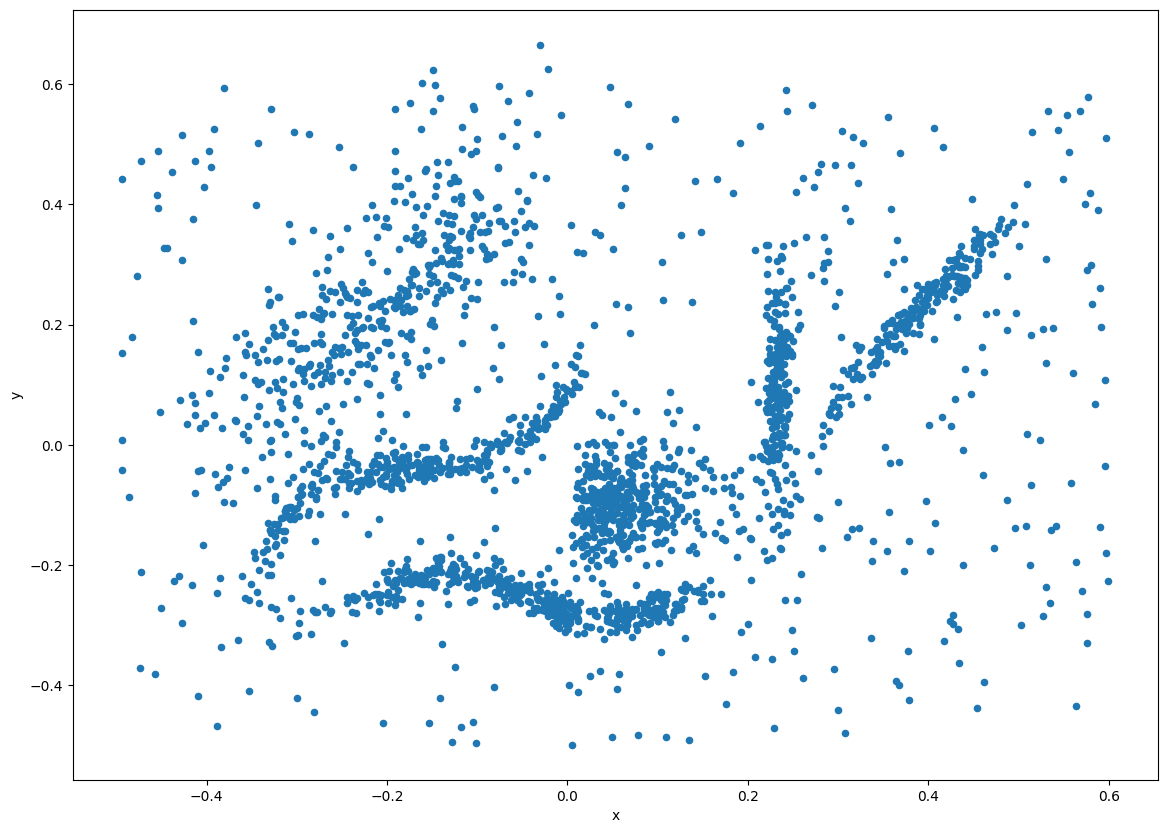

In [ ]:
df.plot(kind='scatter',
               x='x',
               y='y',
               figsize=(14,10))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df)

# Метод Локтя

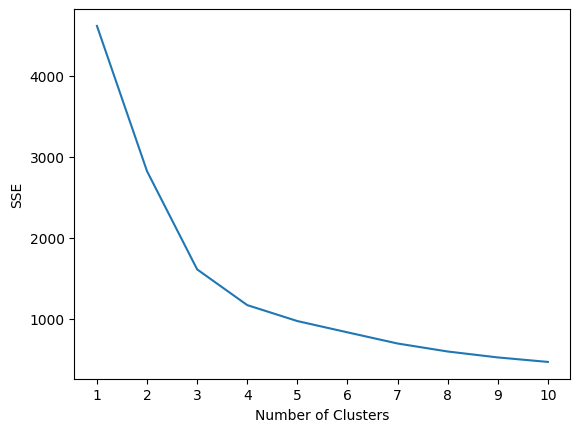

In [ ]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Кластеризация на 3 кластера

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto", init = 'random').fit(df)
kmeansp = KMeans(n_clusters=3, random_state=0, n_init="auto", init = 'k-means++').fit(df)

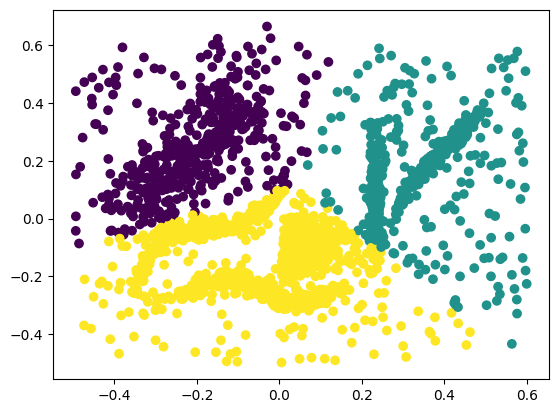

In [ ]:
plt.scatter(df['x'], df['y'], c = kmeans.labels_.tolist())

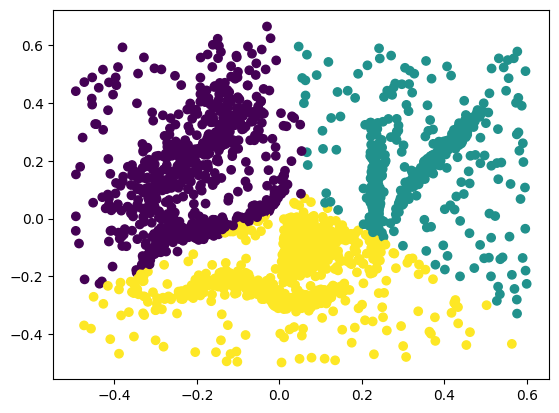

In [ ]:
plt.scatter(df['x'], df['y'], c = kmeansp.labels_.tolist())